

# Fall21-DATA601-HW-3

Due Date: 11/07/2021 (Sunday) by 23:59 pm 


[Google Form to submit your work](https://forms.gle/p6XstTNSrX1zJWCV6)

## Dataset Resources

[Vehicle Crashes](https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes/65du-s3qu)

[Personal Details](https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Person-Details-/py4c-dicf)

[Vehicle Details](https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Vehicle-Details/mhft-5t5y)

## Set-up

In [ ]:
from zipfile import ZipFile

import pandas as pd

In [ ]:
## Don't change anything here
## Make sure that you run this code.

!wget https://github.com/mguner/teaching/raw/main/datasets/MD_Crashes/Archive.zip

!wget https://raw.githubusercontent.com/mguner/teaching/main/datasets/Encodings/turkish_names.csv

--2021-10-30 06:38:07--  https://github.com/mguner/teaching/raw/main/datasets/MD_Crashes/Archive.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mguner/teaching/main/datasets/MD_Crashes/Archive.zip [following]
--2021-10-30 06:38:07--  https://raw.githubusercontent.com/mguner/teaching/main/datasets/MD_Crashes/Archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51797738 (49M) [application/zip]
Saving to: ‘Archive.zip’

Archive.zip         100%[===================>]  49.40M   173MB/s    in 0.3s    

2021-10-30 06:38:09 (173 MB/s) - ‘Archive.zip’ saved [51797738/51797738]

--2021-10-30 0

# New Section

__Note!!__ When you refresh the files then the file structure should look like below.

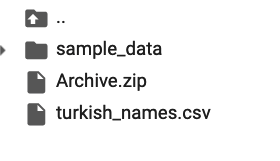

# Problem-1 (10 pts)

Use zipfile module to extract the files from 'Archive.zip' into a folder with the name 'data'. Result should look like below.

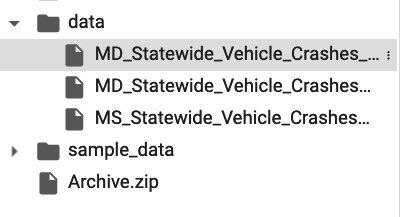

__Note:__ If you cannot solve this problem you can ask for the answer with a penalty of 10 pts.

In [ ]:
## Your Answer 

# Create a ZipFile Object and load sample.zip in it
with ZipFile('Archive.zip', 'r') as zipObj:
# Extract all the contents of zip file in different directory
  zipObj.extractall('data')

# Problem-2 (10 pts)

Read the csv file 'turkish_names.csv' using pandas.

Note that initally you might get an error. Use a library that we covered in the class to get around the error.

Final result should look like below.

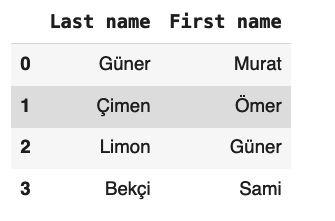

In [ ]:
## Your Answer 

import chardet 
#pd.read_csv('turkish_names.csv')

with open("/content/turkish_names.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(50000))

# check what the character encoding might be
print(result)

pd.read_csv('turkish_names.csv', encoding= 'ISO-8859-1')


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


,Last name,First name
0,Güner,Murat
1,Çimen,Ömer
2,Limon,Güner
3,Bekçi,Sami


# Problem-3 (10 pts)

In [ ]:
## don't change anything in this cell
## make sure that you run this cell
people = pd.read_csv('data/MD_Statewide_Vehicle_Crashes_20-21_Anonymized_Person_Details.csv', index_col = 0)

vehicles = pd.read_csv('data/MD_Statewide_Vehicle_Crashes_20-21_Vehicle_Details.csv', index_col = 0)

crashes = pd.read_csv('data/MS_Statewide_Vehicle_Crashes_20.csv', index_col = 0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Note that in 'crashes' data there is a 'COLLISION_TYPE_DESC' column that records the type of the collision. 

- Show the collision types and their counts.
- Don't forget to count 'NaN' values too!

In [ ]:
## Your Answer

#crashes.head(10)
crashes.COLLISION_TYPE_DESC.value_counts(dropna = False)

Single Vehicle                        36277
Same Direction Rear End               32406
Other                                 20343
Same Movement Angle                   18514
Same Direction Sideswipe              11050
Head On Left Turn                      5867
Head On                                3603
Unknown                                3159
Same Direction Left Turn               3081
Same Direction Right Turn              3015
Opposite Direction Sideswipe           1837
Not Applicable                         1354
Angle Meets Left Turn                   751
Same Direction Rear End Left Turn       702
Angle Meets Right Turn                  555
Same Direction Rear End Right Turn      520
Same Direction Both Left Turn           508
Angle Meets Left Turn Head On           398
Opposite Direction Both Left Turn       273
Name: COLLISION_TYPE_DESC, dtype: int64

# Problem-4 (10 pts)

What is the three most common collision type ('COLLISION_TYPE_DESC') and weather type ('WEATHER_DESC') combination? 

In [ ]:
## Your Answer

#crashes.head(10)
#crashes.WEATHER_DESC.value_counts(dropna= False)

crashes.groupby(['COLLISION_TYPE_DESC', 'WEATHER_DESC']).size().sort_values(ascending=False)[:3]
#crashes.groupby(['COLLISION_TYPE_DESC', 'WEATHER_DESC']).size()

COLLISION_TYPE_DESC      WEATHER_DESC  
Single Vehicle           Raining           7144
Same Direction Rear End  Raining           3864
                         Not Applicable    2830
dtype: int64

# Problem-5 (20 pts)

- Use 'ACC_DATE' column and convert it to 'datetime' object in pandas.
- Create a new column 'accident_date' in 'crashes' data and store the result you obtained above in that column.
- Result should look like below.


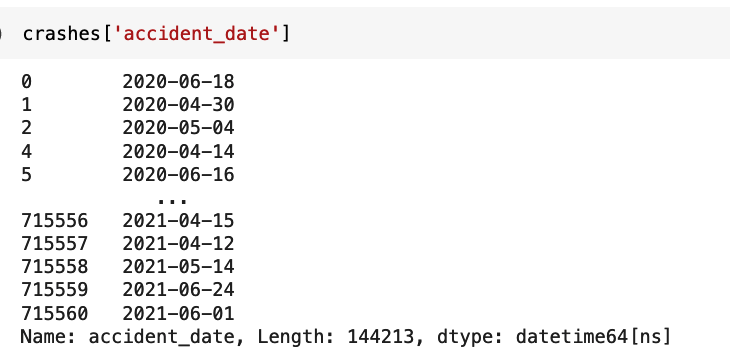

In [ ]:
## Your answer

crashes['accident_date'] = pd.to_datetime(crashes['ACC_DATE'], format = '%Y%m%d')

crashes['accident_date']

#crashes['ACC_DATE']
#pd.to_datetime(crashes['ACC_DATE'], format = '%Y%m%d')
#crashes['ACC_DATE'] = crashes['accident_date']

0        2020-06-18
1        2020-04-30
2        2020-05-04
4        2020-04-14
5        2020-06-16
            ...    
715556   2021-04-15
715557   2021-04-12
715558   2021-05-14
715559   2021-06-24
715560   2021-06-01
Name: accident_date, Length: 144213, dtype: datetime64[ns]

# Problem-6 (20 pts)

- Use both 'accident_date' and 'ACC_TIME' to create full datetime object that includes both date and the time of the crash.

- Store the result in a new column named 'accident_datetime'

- Result should look like below

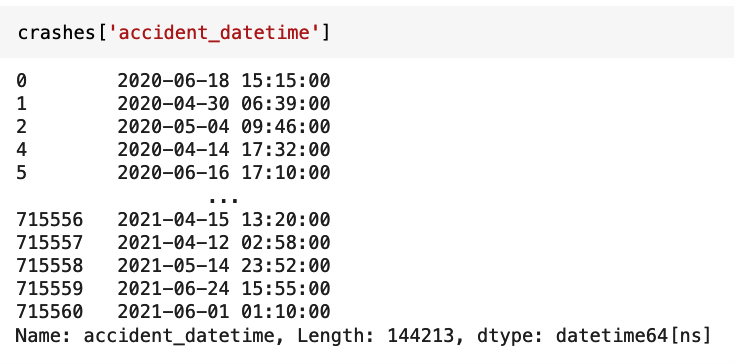

In [ ]:
## Your Answer
crashes['accident_datetime'] = crashes['accident_date']   + pd.to_timedelta(crashes['ACC_TIME'])

#pd.to_datetime(
#crashes['accident_date']   + pd.to_timedelta(crashes['ACC_TIME'])
crashes['accident_datetime']

0        2020-06-18 15:15:00
1        2020-04-30 06:39:00
2        2020-05-04 09:46:00
4        2020-04-14 17:32:00
5        2020-06-16 17:10:00
                 ...        
715556   2021-04-15 13:20:00
715557   2021-04-12 02:58:00
715558   2021-05-14 23:52:00
715559   2021-06-24 15:55:00
715560   2021-06-01 01:10:00
Name: accident_datetime, Length: 144213, dtype: datetime64[ns]

# Problem-7 (10 pts)

## Problem 7-a)

On which day of the week (Monday through Sunday) do the most of the crashes happen?

In [ ]:
## Your Answer
crashes['accident_datetime'].dt.day_name().value_counts().sort_values().index[-1]


'Friday'

## Problem 7-b)
On which hour of the day (00 - 24) do the most of the crashes happen?

In [ ]:
crashes['accident_datetime'].dt.hour.value_counts().sort_values().index[-1]

16

# Problem-8 (10 pts)

- Note that both `people` and `crashes` data has 'REPORT_NO' columns. Now using this column combine these two dataframes. 

- We would like to keep all the rows on the 'crash' dataframe in this merge. Make sure that you explicitly set the parameters so that this would definitely happen. 

- Also if there are any column names that is shared by the two of these dataframes make sure that at the resulting dataframe would record these columns with '_crashes' and '_people' suffixes. 


In [ ]:
## Your Answer
crashes.merge(people, how='left', on='REPORT_NO', suffixes=('_crashes', '_people'))


,YEAR_crashes,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,COLLISION_TYPE_DESC,COLLISION_TYPE_CODE,SURF_COND_DESC,SURF_COND_CODE,LANE_DESC,LANE_CODE,RD_COND_DESC,RD_COND_CODE,RD_DIV_DESC,RD_DIV_CODE,FIX_OBJ_DESC,FIX_OBJ_CODE,REPORT_NO,REPORT_TYPE,WEATHER_DESC,WEATHER_CODE,ACC_DATE,ACC_TIME,LOC_CODE,SIGNAL_FLAG_DESC,SIGNAL_FLAG,C_M_ZONE_FLAG,AGENCY_CODE,AREA_CODE,HARM_EVENT_DESC1,HARM_EVENT_CODE1,HARM_EVENT_DESC2,HARM_EVENT_CODE2,RTE_NO,ROUTE_TYPE_CODE,...,OCC_SEAT_POS_CODE,PED_VISIBLE_DESC,PED_VISIBLE_CODE,PED_OBEY_DESC,PED_OBEY_CODE,PED_TYPE_DESC,PED_TYPE_CODE,PED_LOCATION_CODE,MOVEMENT_DESC,MOVEMENT_CODE,PERSON_TYPE_DESC,PERSON_TYPE,ALCOHOL_TEST_DESC,ALCOHOL_TEST_CODE,ALCOHOL_TESTTYPE_DESC,ALCOHOL_TESTTYPE_CODE,DRUG_TEST_DESC,DRUG_TEST_CODE,DRUG_TESTRESULT_DESC,DRUG_TESTRESULT_CODE,BAC_CODE,FAULT_FLAG_DESC,FAULT_FLAG,EQUIP_PROB_DESC,EQUIP_PROB_CODE,SAF_EQUIP_DESC,SAF_EQUIP_CODE,EJECT_DESC,EJECT_CODE,DATE_OF_BIRTH,PERSON_ID,LICENSE_STATE_CODE,CLASS,CDL_FLAG_DESC,CDL_FLAG,VEHICLE_ID,EMS_UNIT_LABEL,AIRBAG_DEPLOYED,YEAR_people,Quarter
0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,Other,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,AE58770052,Property Damage Crash,Not Applicable,0.00,20200618,15:15:00,NaN,No,N,N,BACOPD,UNK,Parked Vehicle,2.0,Not Applicable,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver,D,Not Applicable,0.0,NaN,NaN,Not Applicable,0.0,NaN,NaN,NaN,True,Y,Unknown,99.0,Unknown,99.0,Not Applicable,0.0,NaN,53715bb2-0082-4089-9a9e-62eabfd94dc8,NaN,NaN,False,False,3c9e8766-8b2a-4774-b85c-c645f2eabba0,NaN,0.0,2020.0,Q2
1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,Non Intersection,1.0,Other,88,Dry,2.0,Left Turn Lane,2.0,No Defects,1.0,One-way Trafficway,2.0,Other Pole,10.0,ADJ984001J,Injury Crash,NaN,7.01,20200430,06:39:00,1003,Yes,Y,N,BALTIMORE,UNK,Other Vehicle,1.0,Other Vehicle,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver,D,Not Applicable,0.0,NaN,NaN,Not Applicable,0.0,NaN,NaN,NaN,False,N,No Misuse,1.0,Shoulder/Lap Belt(s),13.0,Not Ejected/Trapped,1.0,19750621.0,2a107168-e876-4624-be53-b123f41cf3ae,MD,NaN,False,False,6e506abc-74ce-46a2-b48c-2e09cdb1c20f,B,1.0,2020.0,Q2
2,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,Non Intersection,1.0,Other,88,Dry,2.0,Left Turn Lane,2.0,No Defects,1.0,One-way Trafficway,2.0,Other Pole,10.0,ADJ984001J,Injury Crash,NaN,7.01,20200430,06:39:00,1003,Yes,Y,N,BALTIMORE,UNK,Other Vehicle,1.0,Other Vehicle,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver,D,Not Applicable,0.0,NaN,NaN,Not Applicable,0.0,NaN,NaN,NaN,False,N,No Misuse,1.0,Shoulder/Lap Belt(s),13.0,Not Ejected/Trapped,1.0,NaN,9fe87418-8ebe-4ebd-9bd0-b6b16c2555c4,NaN,NaN,False,False,dd5c5d0a-2a52-4473-a33e-a7441e238b37,NaN,1.0,2020.0,Q2
3,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,Non Intersection,1.0,Other,88,Dry,2.0,Left Turn Lane,2.0,No Defects,1.0,One-way Trafficway,2.0,Other Pole,10.0,ADJ984001J,Injury Crash,NaN,7.01,20200430,06:39:00,1003,Yes,Y,N,BALTIMORE,UNK,Other Vehicle,1.0,Other Vehicle,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver,D,Not Applicable,0.0,NaN,NaN,Not Applicable,0.0,NaN,NaN,NaN,False,N,Not Applicable,0.0,Shoulder/Lap Belt(s),13.0,Not Ejected/Trapped,1.0,19670216.0,7c40af46-a448-4759-9c87-c029dc6f9ab4,MD,NaN,False,False,d8ade674-0336-4221-a2b0-f998ae7d4f36,NaN,1.0,2020.0,Q2
4,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,Non Intersection,1.0,Other,88,Dry,2.0,Left Turn Lane,2.0,No Defects,1.0,One-way Trafficway,2.0,Other Pole,10.0,ADJ984001J,Injury Crash,NaN,7.01,20200430,06:39:00,1003,Yes,Y,N,BALTIMORE,UNK,Other Vehicle,1.0,Other Vehicle,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver,D,Not Applicable,0.0,NaN,NaN,Not Applicable,0.0,NaN,NaN,NaN,True,Y,Not Applicable,0.0,Not Applicable,0.0,Not Ejected/Trapped,1.0,19981206.0,a488a97c-3b5c-426d-a282-00ac93517677,MD,NaN,False,False,2212f949-edeb-4183-9b28-681904096b0e,A,2.0,2020.0,Q2
...,...,...,...,...,...,...,...,